In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import constants
import scipy.stats as stats

# load the cleaned data csv
def load_data():
    df = pd.read_csv(constants.PATH_TO_CLEANED_DATA_CSV)
    df.replace("--", pd.NA, inplace=True)
    df.replace("o", 0, inplace=True)
    df = df.astype('Int64')
    return df


## General Stats


In [491]:
# what columns have above 10% missing values?
df = load_data()
na_counts = df.isna().sum()
print(na_counts/len(df))

PLAY #          0.000000
ODK             0.000000
DN              0.026042
DIST            0.027778
HASH            0.030671
YARD LN         0.027778
PLAY TYPE       0.028935
RESULT          0.013310
GN/LS           0.038194
OFF PLAY        0.841435
OFF STR         0.100116
PLAY DIR        0.056713
QTR             0.030671
TD_SCORED       0.000000
SAFETY          0.000000
FUMBLE          0.000000
INTERCEPTION    0.000000
TURNOVER        0.000000
RB              0.000000
TE              0.000000
WR              0.000000
dtype: float64


/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/3590092771.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("o", 0, inplace=True)


In [492]:
# Drop NaN values and convert to float once before filtering
gn_ls_clean = df['GN/LS'].dropna().astype(float)

# total plays 
print(f"Total plays: {len(gn_ls_clean)}")

# average yards per play
print(f"Average yards per play: {gn_ls_clean.mean()}")

# standard deviation of yards per play
print(f"Standard deviation of yards per play: {gn_ls_clean.std()}")

# number of times we LOST yards (filtering after dropping NaN)
print(f"Number of times we LOST yards: {len(gn_ls_clean[gn_ls_clean < 0])}")

# percent of time we lost yards
print(f"Percent of time we lost yards: {(len(gn_ls_clean[gn_ls_clean < 0]) / len(df)) * 100:.2f}%")


Total plays: 1662
Average yards per play: 4.276774969915764
Standard deviation of yards per play: 9.782729486980397
Number of times we LOST yards: 313
Percent of time we lost yards: 18.11%


/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/589991197.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=play_type_counts.index, y=play_type_counts.values, palette='viridis')


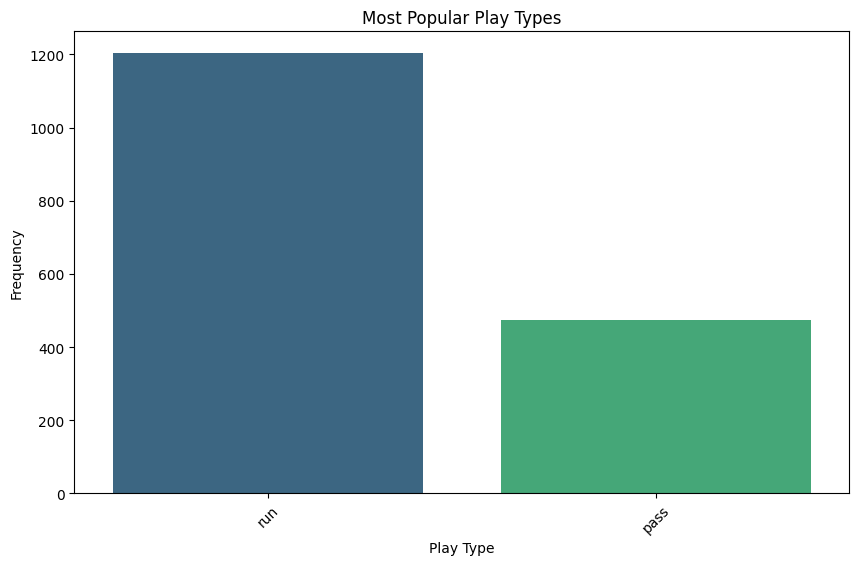

In [493]:
# show most popular play types
play_type_counts = df['PLAY TYPE'].value_counts()
play_type_counts.index = play_type_counts.index.map(constants.GET_PLAY_TYPE)
plt.figure(figsize=(10, 6))
sns.barplot(x=play_type_counts.index, y=play_type_counts.values, palette='viridis')
plt.title('Most Popular Play Types')
plt.xlabel('Play Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

274


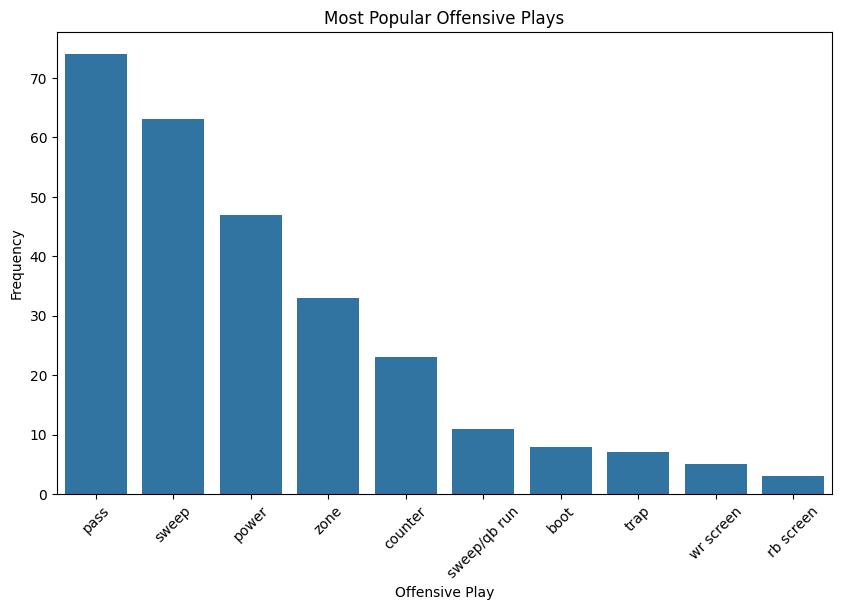

In [494]:
# show most popular offensive plays
offensive_play_counts = df['OFF PLAY'].dropna().value_counts()
print(offensive_play_counts.sum())
x_values = offensive_play_counts.index.astype(int).map(constants.GET_OFF_PLAY)
y_values = offensive_play_counts.values.astype(int)
plt.figure(figsize=(10, 6))
sns.barplot(x=x_values, y=y_values)
plt.title('Most Popular Offensive Plays')
plt.xlabel('Offensive Play')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Play Direction Stats

/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/3590092771.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("o", 0, inplace=True)


Total plays to strong side: 600
Total plays to weak side: 437


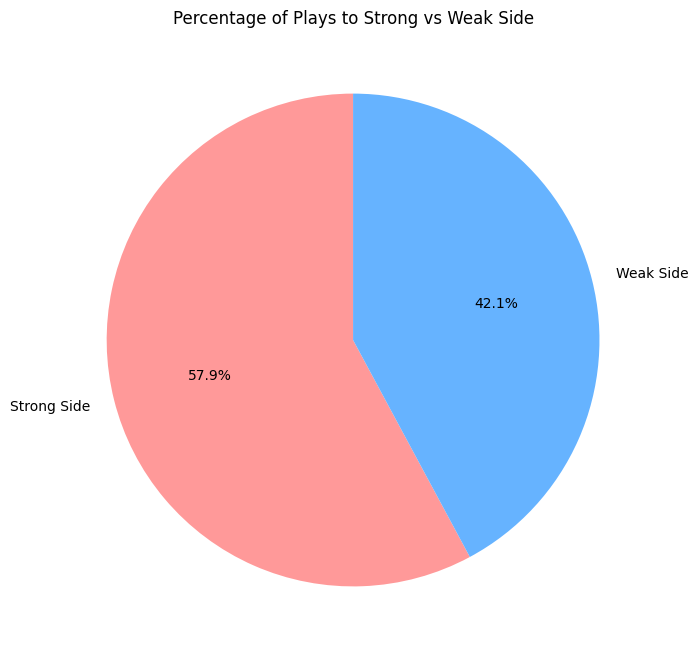

In [495]:
# show percent of time plays are to strong side or weak side
df = load_data()
df['PLAY DIR'] = df['PLAY DIR'].dropna()
df['OFF STR'] = df['OFF STR'].dropna()

count_plays_to_strong_side = (df['PLAY DIR'] == df['OFF STR']).sum()
count_plays_while_balanced = (df['OFF STR'] == 2).sum()
count_plays_to_weak_side = (df['PLAY DIR'] != df['OFF STR']).sum() - count_plays_while_balanced
percent_plays_to_strong_side = (count_plays_to_strong_side / (count_plays_to_strong_side + count_plays_to_weak_side)).astype(float)
print(f"Total plays to strong side: {count_plays_to_strong_side}")
print(f"Total plays to weak side: {count_plays_to_weak_side}")
plt.figure(figsize=(8, 8))
plt.pie([percent_plays_to_strong_side, 1-percent_plays_to_strong_side], labels=['Strong Side', 'Weak Side'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Percentage of Plays to Strong vs Weak Side')
plt.show()

In [496]:
# did we get more yards on median on strong side or weak side?
# Ensure 'GN/LS' is numeric
df['GN/LS'] = pd.to_numeric(df['GN/LS'], errors='coerce')

# gets two groups of yards on strong side and weak side
strong_side_group = df.loc[df['PLAY DIR'] == df['OFF STR'], 'GN/LS'].dropna()
weak_side_group = df.loc[df['PLAY DIR'] != df['OFF STR'], 'GN/LS'].dropna()

# Compute mean and std
mean_yards_strong_side = strong_side_group.mean(skipna=True)
std_yards_strong_side = strong_side_group.std(skipna=True)
mean_yards_weak_side = weak_side_group.mean(skipna=True)
std_yards_weak_side = weak_side_group.std(skipna=True)


print(f"Mean yards on strong side: {mean_yards_strong_side}")
print(f"Mean yards on weak side: {mean_yards_weak_side}\n")

print(f"Std yards on strong side: {std_yards_strong_side}")
print(f"Std yards on weak side: {std_yards_weak_side}\n")

# evaluate if the variances are equal
f_stat, p_value = stats.levene(strong_side_group, weak_side_group)  

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Significant difference in variances!")
else:
    print("No significant difference in variances.")


Mean yards on strong side: 4.630691399662732
Mean yards on weak side: 4.716648291069459

Std yards on strong side: 10.001192616089943
Std yards on weak side: 9.879750435377783

F-statistic: 0.23362654532680885
P-value: 0.62891837884856
No significant difference in variances.


## Down Related Stats

In [497]:
# Clean up 'PLAY TYPE' and 'DN' columns, ensure they are ints
df = load_data()
df_cleaned = df.dropna(subset=['PLAY TYPE', 'DN'])
df_cleaned['PLAY TYPE'] = df_cleaned['PLAY TYPE'].astype(int)
df_cleaned['DN'] = df_cleaned['DN'].astype(int)

# Split into running and passing plays
running_plays = df_cleaned[df_cleaned['PLAY TYPE'] == 0]
passing_plays = df_cleaned[df_cleaned['PLAY TYPE'] == 1]

# Filter by down for running plays
run_on_1st = running_plays[running_plays['DN'] == 1]
run_on_2nd = running_plays[running_plays['DN'] == 2]
run_on_3rd = running_plays[running_plays['DN'] == 3]
run_on_4th = running_plays[running_plays['DN'] == 4]

# Filter by down for passing plays
pass_on_1st = passing_plays[passing_plays['DN'] == 1]
pass_on_2nd = passing_plays[passing_plays['DN'] == 2]
pass_on_3rd = passing_plays[passing_plays['DN'] == 3]
pass_on_4th = passing_plays[passing_plays['DN'] == 4]

# Calculate the percentages
running_on_1st_percent = len(run_on_1st) / (len(run_on_1st) + len(pass_on_1st))
running_on_2nd_percent = len(run_on_2nd) / (len(run_on_2nd) + len(pass_on_2nd))
running_on_3rd_percent = len(run_on_3rd) / (len(run_on_3rd) + len(pass_on_3rd))
running_on_4th_percent = len(run_on_4th) / (len(run_on_4th) + len(pass_on_4th))

# Print the results
print(f"Running on 1st down: {running_on_1st_percent}")
print(f"Running on 2nd down: {running_on_2nd_percent}")
print(f"Running on 3rd down: {running_on_3rd_percent}")
print(f"Running on 4th down: {running_on_4th_percent}\n")


/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/3590092771.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("o", 0, inplace=True)
/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/3754108328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PLAY TYPE'] = df_cleaned['PLAY TYPE'].astype(int)
/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/3754108328.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Running on 1st down: 0.7945007235890015
Running on 2nd down: 0.7423076923076923
Running on 3rd down: 0.5521126760563381
Running on 4th down: 0.676056338028169



## Personnel Related Stats

#### General Functions for Personnel Stats

In [498]:
def run_stats_for_personnel(data_frame, personnel_type, number_of_personnel = 0, equal_less_more = ">", run_only = False, pass_only = False) -> None:
    """
    This function will take in a personnel type and a data frame and print the stats for the personnel type.
    Personnel type is the column name of the personnel type, wr, rb, te, etc.
    Number of personnel is the number of players on the field for the personnel type.
    equal_less_more is the comparison operator for the number of personnel.
    Also will display multiple plots. 
    """
    personnel_plays = None
    # adjust for the comparison operator
    if equal_less_more == ">=":
        number_of_personnel = number_of_personnel - 1
        equal_less_more = ">"
    elif equal_less_more == "<=":
        number_of_personnel = number_of_personnel + 1
        equal_less_more = "<"
    elif equal_less_more == "==":
        equal_less_more = "="

    # get the personnel plays for the personnel type
    if equal_less_more == ">":
        personnel_plays = data_frame.loc[data_frame[personnel_type].dropna() >= number_of_personnel]
    elif equal_less_more == "<":
        personnel_plays = data_frame.loc[data_frame[personnel_type].dropna() <= number_of_personnel]
    elif equal_less_more == "=":
        personnel_plays = data_frame.loc[data_frame[personnel_type].dropna() == number_of_personnel]

    if run_only and pass_only:
        return None
    
    if run_only:
        personnel_plays = personnel_plays.loc[personnel_plays['PLAY TYPE'] == 0]
    elif pass_only:
        personnel_plays = personnel_plays.loc[personnel_plays['PLAY TYPE'] == 1]
    
    # personnel_plays has all the plays for the specified number of personnel type
    # get some basic stats
    print(f"Plays with {equal_less_more} {number_of_personnel} {personnel_type}: {len(personnel_plays)}")
    print(f"Yards with {equal_less_more} {number_of_personnel} {personnel_type}: {personnel_plays['GN/LS'].sum()}")
    print(f"Yards avg with {equal_less_more} {number_of_personnel} {personnel_type}: {personnel_plays['GN/LS'].mean()}")
    print(f"Yards std with {equal_less_more} {number_of_personnel} {personnel_type}: {personnel_plays['GN/LS'].std()}")
    print(f"--------------------------------\n")


#### TE Related Stats

In [499]:
# TE vs No TE run plays
df = load_data()
plays_with_no_te_label = df['TE'].isna().sum()
plays_with_te = df.loc[df['TE'].dropna() > 0]
plays_without_te = df.loc[df['TE'].dropna() == 0]

print(f"Plays with TE: {len(plays_with_te)}")
print(f"Plays without TE: {len(plays_without_te)}")
print(f"Plays with no TE label: {plays_with_no_te_label}\n")

# yards total on TE plays vs No TE plays
yards_with_te = plays_with_te['GN/LS'].dropna()
yards_without_te = plays_without_te['GN/LS'].dropna()

print(f"Yards with TE: {yards_with_te.sum()}")
print(f"Yards without TE: {yards_without_te.sum()}\n")

# yards avg on TE plays Vs No TE plays
print(f"Yards avg with TE: {yards_with_te.mean()}") 
print(f"Yards avg without TE: {yards_without_te.mean()}\n")

# yards std on TE plays vs No TE plays
print(f"Yards std with TE: {yards_with_te.std()}")
print(f"Yards std without TE: {yards_without_te.std()}\n")

# now lets look at running plays with and without a TE
print(f"\nRunning plays ONLY--------------------------------")
running_plays_with_te = plays_with_te.loc[df['PLAY TYPE'] == 0]
running_plays_without_te = plays_without_te.loc[df['PLAY TYPE'] == 0]

print(f"Running plays with TE: {len(running_plays_with_te)}")
print(f"Running plays without TE: {len(running_plays_without_te)}\n")

# yards total on running plays with TE vs without TE
yards_running_with_te = running_plays_with_te['GN/LS'].dropna()
yards_running_without_te = running_plays_without_te['GN/LS'].dropna()

print(f"Yards with TE: {yards_running_with_te.sum()}")
print(f"Yards without TE: {yards_running_without_te.sum()}\n")

# yards avg on running plays with TE vs without TE
print(f"Yards avg with TE: {yards_running_with_te.mean()}")
print(f"Yards avg without TE: {yards_running_without_te.mean()}\n")

# yards std on running plays with TE vs without TE
print(f"Yards std with TE: {yards_running_with_te.std()}")
print(f"Yards std without TE: {yards_running_without_te.std()}\n")

Plays with TE: 319
Plays without TE: 1409
Plays with no TE label: 0

Yards with TE: 1097
Yards without TE: 6011

Yards avg with TE: 3.5501618122977345
Yards avg without TE: 4.442719881744272

Yards std with TE: 8.418145308099476
Yards std without TE: 10.063915959063406


Running plays ONLY--------------------------------
Running plays with TE: 241
Running plays without TE: 962

Yards with TE: 967
Yards without TE: 4259

Yards avg with TE: 4.080168776371308
Yards avg without TE: 4.5356762513312034

Yards std with TE: 8.864678718653776
Yards std without TE: 9.86019300108991



/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/3590092771.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("o", 0, inplace=True)


In [500]:
# did we run with or without a TE?
passing_plays_with_te = plays_with_te.loc[df['PLAY TYPE'] == 1]
passing_plays_without_te = plays_without_te.loc[df['PLAY TYPE'] == 1]

percent_run_with_te = len(running_plays_with_te) / (len(running_plays_with_te) + len(passing_plays_with_te))
percent_run_without_te = len(running_plays_without_te) / (len(running_plays_without_te) + len(passing_plays_without_te))

print(f"Percent run with TE: {percent_run_with_te}")
print(f"Percent run without TE: {percent_run_without_te}\n")


Percent run with TE: 0.7850162866449512
Percent run without TE: 0.7016776075857039



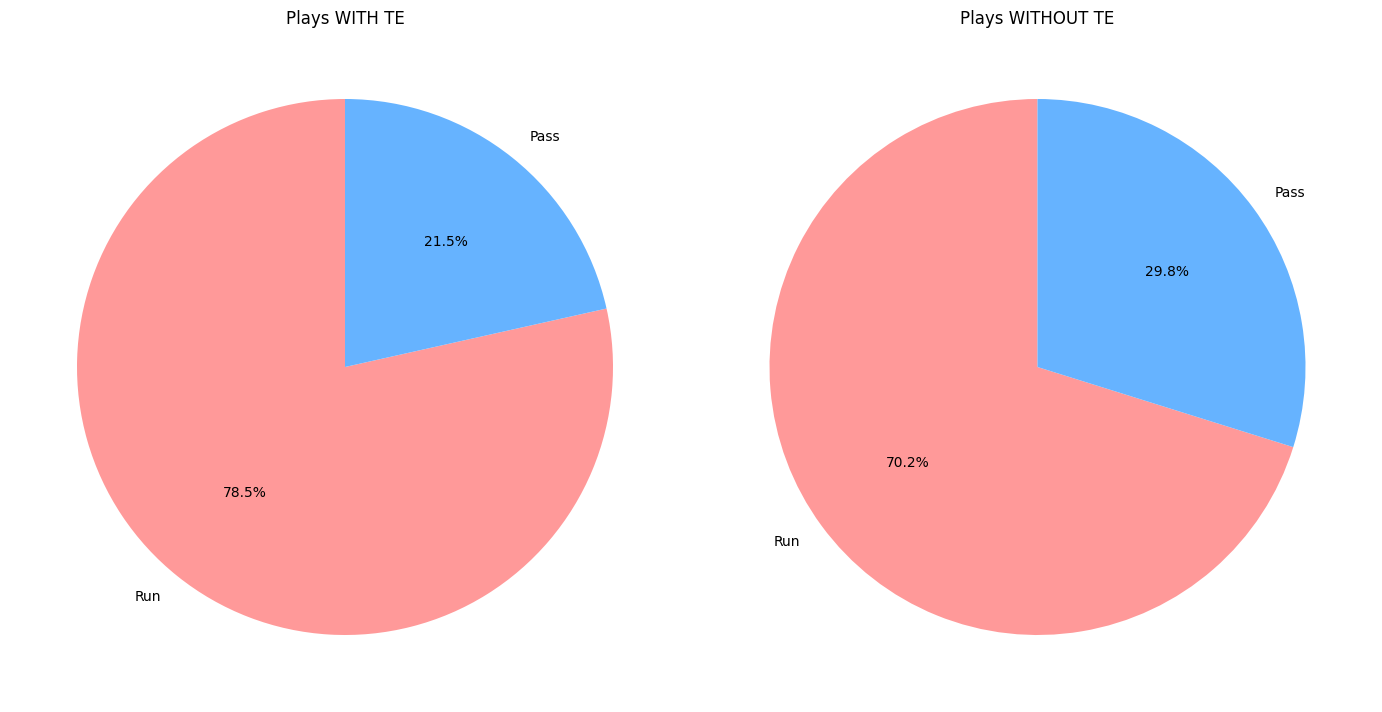

In [501]:
# Create a figure for 2 pie plots
fig, plots = plt.subplots(1, 2, figsize=(14, 7))  # Adjust the figsize as needed

# Pie chart for plays with TE
plots[0].pie([percent_run_with_te, 1 - percent_run_with_te], 
            labels=['Run', 'Pass'], 
            autopct='%1.1f%%', startangle=90, 
            colors=['#ff9999','#66b3ff'])
plots[0].set_title('Plays WITH TE')

# Pie chart for plays without TE
plots[1].pie([percent_run_without_te, 1 - percent_run_without_te], 
            labels=['Run', 'Pass'], 
            autopct='%1.1f%%', startangle=90, 
            colors=['#ff9999','#66b3ff'])
plots[1].set_title('Plays WITHOUT TE')

# Display the plots
plt.tight_layout() 
plt.show()



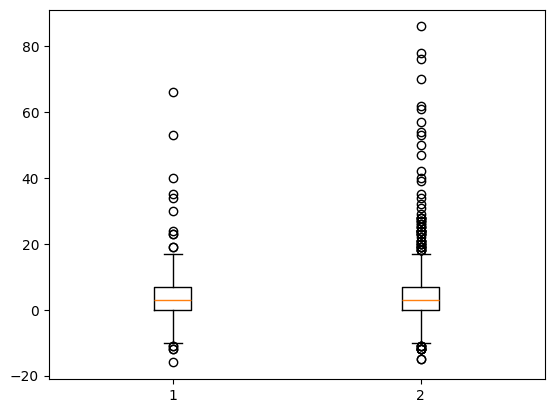

In [502]:
plt.boxplot([yards_running_with_te, yards_running_without_te])
plt.show()

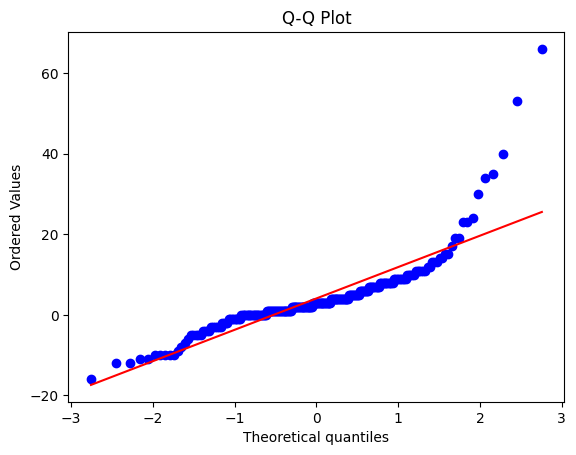

In [503]:
stats.probplot(yards_running_with_te, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

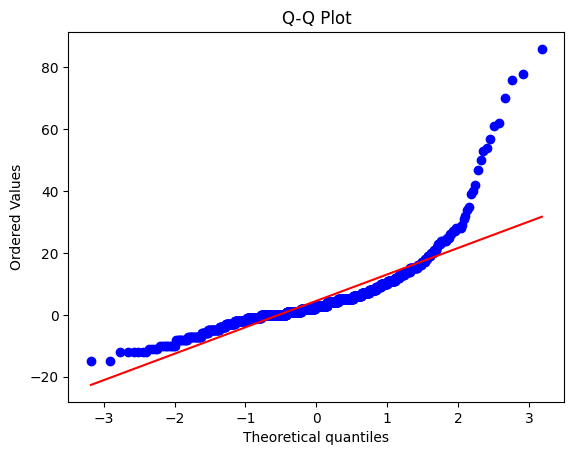

In [504]:
stats.probplot(yards_running_without_te, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [505]:
# looking at the QQ plots, we can see that the data is pretty normally distributed

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(yards_running_with_te, yards_running_without_te, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the results at a 5% significance level
alpha = 0.05  
if p_value < alpha:
    print("The difference in average yards is statistically significant.")
else:
    print("No significant difference in average yards.")

T-Statistic: -0.6905504291433154
P-Value: 0.49025196700667095
No significant difference in average yards.


In [506]:

mean_diff = np.mean(yards_running_with_te) - np.mean(yards_running_without_te)
pooled_std = np.sqrt((np.std(yards_running_with_te, ddof=1) ** 2 + np.std(yards_running_without_te, ddof=1) ** 2) / 2)
cohen_d = mean_diff / pooled_std

print(f"Cohen's d: {cohen_d}")

Cohen's d: -0.04858405280793755


#### RB Related Stats

In [507]:
df = load_data()
run_stats_for_personnel(df, "RB", 1, "==", run_only=True)

df = load_data()
run_stats_for_personnel(df, "RB", 2, "==", run_only=True)


Plays with = 1 RB: 877
Yards with = 1 RB: 4120
Yards avg with = 1 RB: 4.763005780346821
Yards std with = 1 RB: 9.619882970298292
--------------------------------

Plays with = 2 RB: 205
Yards with = 2 RB: 852
Yards avg with = 2 RB: 4.391752577319588
Yards std with = 2 RB: 11.35535910186231
--------------------------------



/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/3590092771.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("o", 0, inplace=True)
/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/3590092771.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("o", 0, inplace=True)


#### WR Related Stats

In [508]:
print("WR Run Only Related Stats--------------------------------")
df = load_data()
run_stats_for_personnel(df, "WR", 2, "==", run_only=True)

df = load_data()
run_stats_for_personnel(df, "WR", 3, "==", run_only=True)

df = load_data()
run_stats_for_personnel(df, "WR", 4, "==", run_only=True)

WR Run Only Related Stats--------------------------------
Plays with = 2 WR: 190
Yards with = 2 WR: 779
Yards avg with = 2 WR: 4.188172043010753
Yards std with = 2 WR: 9.313870498752841
--------------------------------

Plays with = 3 WR: 122
Yards with = 3 WR: 555
Yards avg with = 3 WR: 5.045454545454546
Yards std with = 3 WR: 12.673302404195608
--------------------------------

Plays with = 4 WR: 773
Yards with = 4 WR: 3647
Yards avg with = 4 WR: 4.779816513761468
Yards std with = 4 WR: 9.66831888140515
--------------------------------



/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/3590092771.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("o", 0, inplace=True)
/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/3590092771.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("o", 0, inplace=True)
/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/3590092771.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavio

In [509]:
print("WR Pass Only Related Stats--------------------------------")
df = load_data()
run_stats_for_personnel(df, "WR", 2, "==", pass_only=True)

df = load_data()
run_stats_for_personnel(df, "WR", 3, "==", pass_only=True)

df = load_data()
run_stats_for_personnel(df, "WR", 4, "==", pass_only=True)

WR Pass Only Related Stats--------------------------------
Plays with = 2 WR: 13
Yards with = 2 WR: 62
Yards avg with = 2 WR: 4.769230769230769
Yards std with = 2 WR: 6.660253325435479
--------------------------------

Plays with = 3 WR: 74
Yards with = 3 WR: 204
Yards avg with = 3 WR: 3.0
Yards std with = 3 WR: 7.336272590518162
--------------------------------

Plays with = 4 WR: 343
Yards with = 4 WR: 1595
Yards avg with = 4 WR: 4.938080495356037
Yards std with = 4 WR: 10.521902859384335
--------------------------------



/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/3590092771.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("o", 0, inplace=True)
/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/3590092771.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("o", 0, inplace=True)
/var/folders/6p/djt0r2xs5jvf4tlzys150k5c0000gn/T/ipykernel_74903/3590092771.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavio